# Imports

In [1]:
library(arrow)
library(tidyverse)
library(grid)
library(ggpubr)
library(rstatix)
library(plyr)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘readr’ was built under R version 4.0.5”
── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggpubr’ was built under R version 4.0.5”

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------

Warning message:
“Removed 17 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”


TableGrob (31 x 12) "layout": 65 grobs
    z         cells       name                                           grob
1   0 ( 1-31, 1-12) background               rect[plot.background..rect.1706]
2   1 ( 8- 8, 5- 5)  panel-1-1                      gTree[panel-1.gTree.1214]
3   1 (10-10, 5- 5)  panel-2-1                      gTree[panel-3.gTree.1246]
4   1 (12-12, 5- 5)  panel-3-1                      gTree[panel-5.gTree.1278]
5   1 (14-14, 5- 5)  panel-4-1                      gTree[panel-7.gTree.1310]
6   1 (16-16, 5- 5)  panel-5-1                      gTree[panel-9.gTree.1342]
7   1 (18-18, 5- 5)  panel-6-1                     gTree[panel-11.gTree.1374]
8   1 (20-20, 5- 5)  panel-7-1                     gTree[panel-13.gTree.1406]
9   1 (22-22, 5- 5)  panel-8-1                     gTree[panel-15.gTree.1438]
10  1 (24-24, 5- 5)  panel-9-1                     gTree[panel-17.gTree.1470]
11  1 (26-26, 5- 5) panel-10-1                     gTree[panel-19.gTree.1502]
12  1 ( 8- 8, 7- 7)  pane

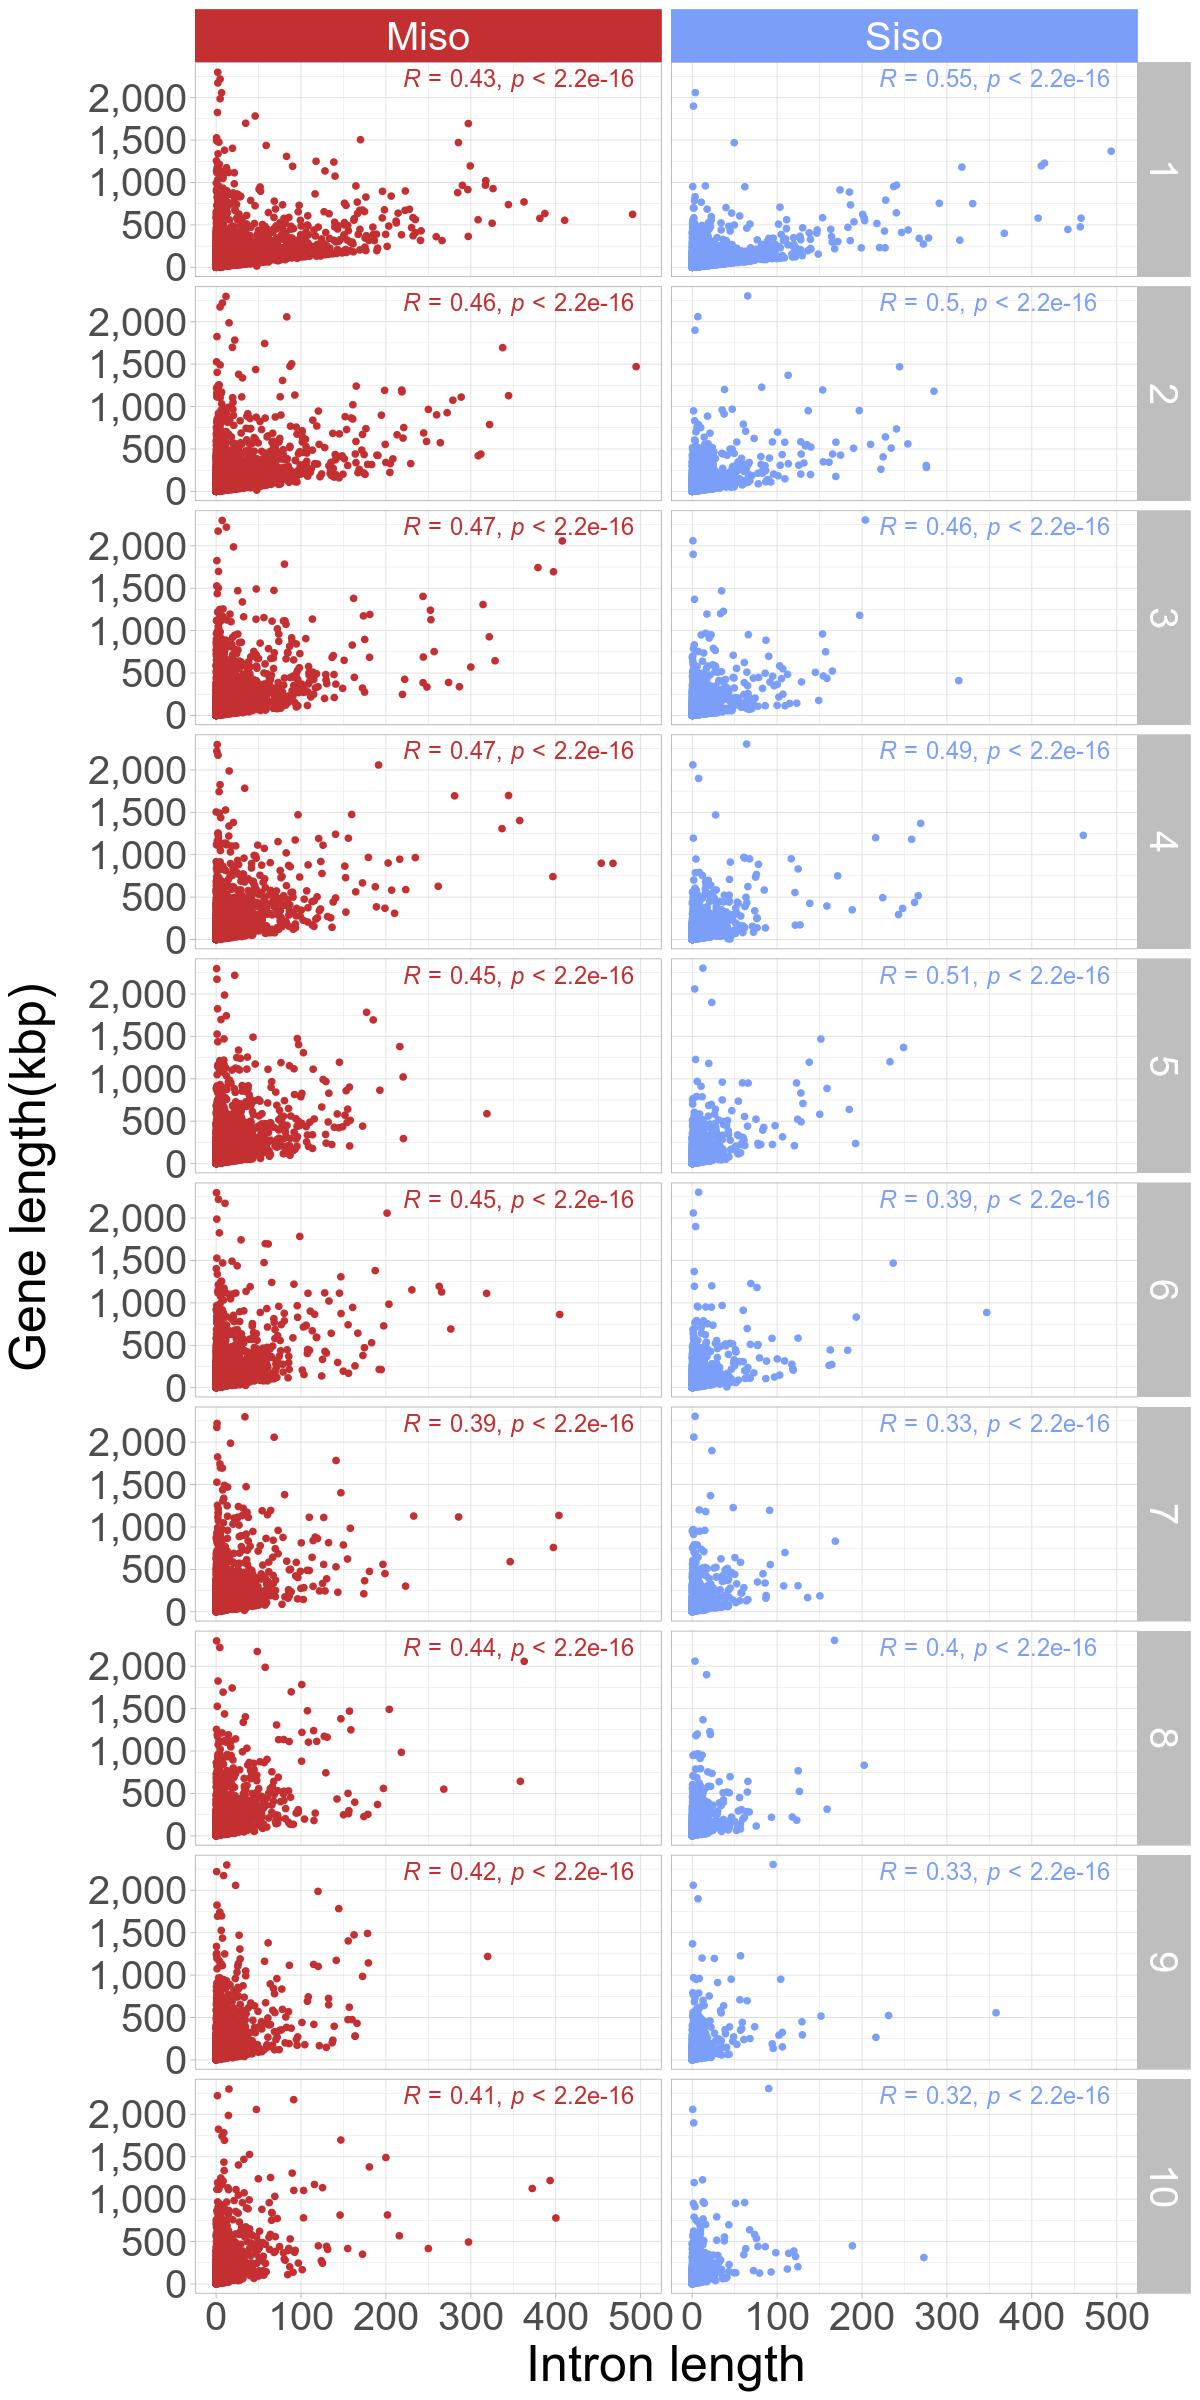

In [4]:


data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlength.parquet')
data <- data[data$Intron_nb <= 10, ]
data = data[(data$Introns_lengths > 0) & (data$Introns_lengths < 2e6), ]

# data <- head(data, 50)
# data
# data


w = 10
h = 20

options(repr.plot.width=w, repr.plot.height=h)

p <- ggplot(data, aes(x=Introns_lengths, y=Length, color=Miso_siso)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 220, label.y = 2200, size = 5) + 
    stat_cor(label.x = 220, label.y = 2200, size = 5) + 
    facet_grid(Intron_nb ~ Miso_siso) + 
    theme_light() + 
    theme(text = element_text(size=30), legend.position="none", axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0))) + 
    labs(y="Gene length(kbp)", x="Intron length") + xlim(0,500) + scale_colour_manual(values = c("#C43032", "#7B9FF9")) +
    scale_y_continuous(labels=function(x) format(x, big.mark = ",", scientific = FALSE))

g <- ggplot_gtable(ggplot_build(p))
stripr <- which(grepl('strip-', g$layout$name))
# palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

fills <- c("#C43032", "#7B9FF9", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey")
k <- 1
for (i in stripr) {
    j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
    g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
    k <- k+1
}
grid.draw(g)
g


Warning message:
“Removed 18 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”


TableGrob (13 x 11) "layout": 19 grobs
    z         cells       name                                           grob
1   0 ( 1-13, 1-11) background               rect[plot.background..rect.1904]
2   1 ( 8- 8, 5- 5)  panel-1-1                      gTree[panel-1.gTree.1840]
3   1 ( 8- 8, 7- 7)  panel-1-2                      gTree[panel-2.gTree.1856]
4   3 ( 6- 6, 5- 5)   axis-t-1                                 zeroGrob[NULL]
5   3 ( 6- 6, 7- 7)   axis-t-2                                 zeroGrob[NULL]
6   3 ( 9- 9, 5- 5)   axis-b-1           absoluteGrob[GRID.absoluteGrob.1860]
7   3 ( 9- 9, 7- 7)   axis-b-2           absoluteGrob[GRID.absoluteGrob.1864]
8   3 ( 8- 8, 4- 4)   axis-l-1           absoluteGrob[GRID.absoluteGrob.1868]
9   3 ( 8- 8, 8- 8)   axis-r-1                                 zeroGrob[NULL]
10  2 ( 7- 7, 5- 5)  strip-t-1                                  gtable[strip]
11  2 ( 7- 7, 7- 7)  strip-t-2                                  gtable[strip]
12  4 ( 5- 5, 5- 7)     x

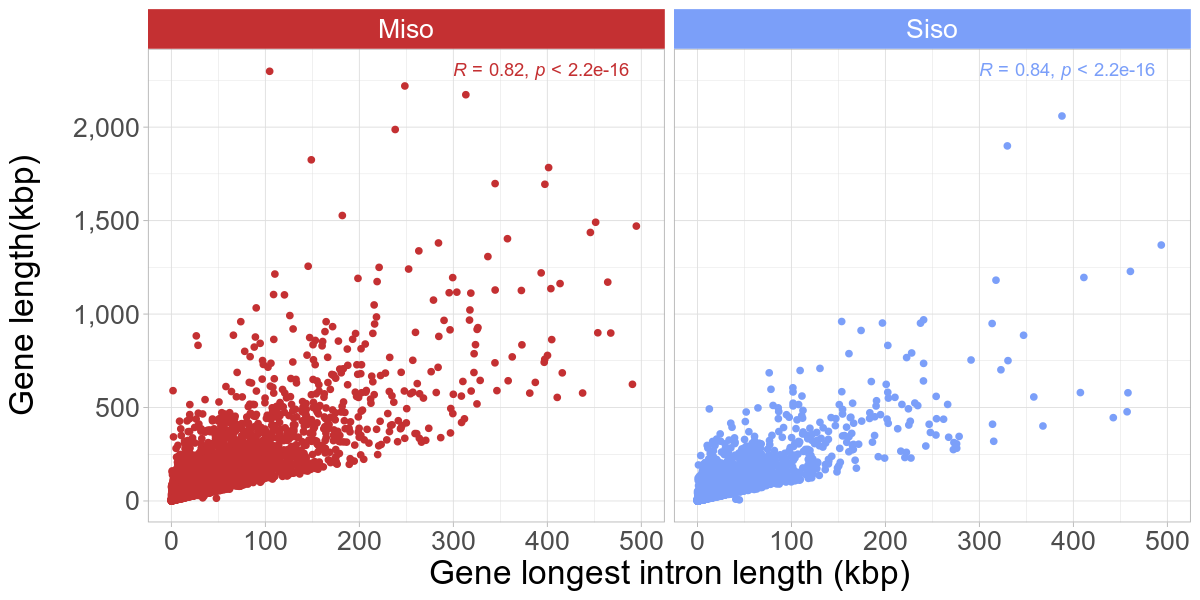

In [6]:
data = read_parquet('/gstock/EXOTIC/data/GENOMICS/genes_length_intronlengthmax.parquet')
# data <- data[data$Intron_nb <= 10, ]
data = data[(data$Intron_length_max > 0), ]
data$cat <- "Global"

# data <- head(data, 50)
# data
# data


w = 10
h = 5

options(repr.plot.width=w, repr.plot.height=h)

p <- ggplot(data, aes(x=Intron_length_max, y=Length, color=Miso_siso)) + 
    geom_point() + 
#     stat_smooth(method = "lm", col = "red") +  
#     stat_regline_equation(label.x = 320, label.y = 2300) + 
#     stat_cor(aes(label = paste(..rr.label.., ..p.label.., sep = "~`,`~")), label.x = 320, label.y = 2200) + 
    stat_cor(label.x = 300, label.y = 2300) + 
    facet_grid(. ~ Miso_siso) + 
    theme_light() + 
    theme(text = element_text(size=20), axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)), legend.position = "none") + 
    labs(y="Gene length(kbp)", x="Gene longest intron length (kbp)") + xlim(0,500) + scale_colour_manual(values = c("#C43032", "#7B9FF9")) + 
    scale_y_continuous(labels=function(x) format(x, big.mark = ",", scientific = FALSE))


g <- ggplot_gtable(ggplot_build(p))
stripr <- which(grepl('strip-', g$layout$name))
# palette={'Siso' : '#7B9FF9', 'Miso' : '#C43032'}

fills <- c("#C43032", "#7B9FF9", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey")
k <- 1
for (i in stripr) {
    j <- which(grepl('rect', g$grobs[[i]]$grobs[[1]]$childrenOrder))
    g$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
    k <- k+1
}
grid.draw(g)
g